# **Import Libraries**

In [24]:
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,  Dropout
from sklearn.preprocessing import StandardScaler

In [13]:
train_labels = np.load('./data/new_Data/train_labels.npy')
train_predictions = np.load('./data/new_Data/train_predictions.npy')

test_labels = np.load('./data/new_Data/test_labels.npy')
test_predictions = np.load('./data/new_Data/test_predictions.npy')

In [14]:
with open('./data/new_Data/date_mapping.json') as f:
    data_json = json.load(f)
    print(data_json)

{'1': '2017-10-12', '2': '2017-10-13', '3': '2017-10-16', '4': '2017-10-17', '5': '2017-10-18', '6': '2017-10-19', '7': '2017-10-23', '8': '2017-10-24', '9': '2017-10-25', '10': '2017-10-26', '11': '2017-10-27', '12': '2017-10-30', '13': '2017-10-31', '14': '2017-11-01', '15': '2017-11-02', '16': '2017-11-03', '17': '2017-11-06', '18': '2017-11-07', '19': '2017-11-08', '20': '2017-11-09', '21': '2017-11-10', '22': '2017-11-13', '23': '2017-11-14', '24': '2017-11-15', '25': '2017-11-16', '26': '2017-11-17', '27': '2017-11-20', '28': '2017-11-21', '29': '2017-11-22', '30': '2017-11-23', '31': '2017-11-24', '32': '2017-11-27', '33': '2017-11-28', '34': '2017-11-29', '35': '2017-11-30', '36': '2017-12-01', '37': '2017-12-04', '38': '2017-12-05', '39': '2017-12-06', '40': '2017-12-07', '41': '2017-12-08', '42': '2017-12-11', '43': '2017-12-12', '44': '2017-12-13', '45': '2017-12-14', '46': '2017-12-15', '47': '2017-12-18', '48': '2017-12-19', '49': '2017-12-20', '50': '2017-12-21', '51': '2

In [15]:
# Convert the data_json dictionary to a DataFrame
date_mapping_df = pd.DataFrame(list(data_json.items()), columns=['Index', 'Date'])
date_mapping_df

# in the dataframe take out the first 1032 rows
train_date_mapping_df = date_mapping_df.iloc[:1032]
train_date_mapping_df['Train Labels'] = train_labels
train_date_mapping_df['Predictions_CNN'] = train_predictions
train_date_mapping_df

C:\Users\manav\AppData\Local\Temp\ipykernel_20008\390407576.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_date_mapping_df['Train Labels'] = train_labels
C:\Users\manav\AppData\Local\Temp\ipykernel_20008\390407576.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_date_mapping_df['Predictions_CNN'] = train_predictions
c:\Users\manav\OneDrive\Desktop\NIT Surathkal\Semester 7\IT-457\Project\Stock-Trend-Prediction\.venv\lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overf

,Index,Date,Train Labels,Predictions_CNN
0,1,2017-10-12,0.50,0.506836
1,2,2017-10-13,0.52,0.507812
2,3,2017-10-16,0.59,0.508301
3,4,2017-10-17,0.49,0.506836
4,5,2017-10-18,0.46,0.508301
...,...,...,...,...
1027,1028,2021-12-10,0.48,0.468506
1028,1029,2021-12-13,0.50,0.468994
1029,1030,2021-12-14,0.54,0.470703
1030,1031,2021-12-15,0.46,0.469238


In [16]:
train_data_sentiment = pd.read_csv('./data/new_Data/train_data_sentiment.csv')
train_data_sentiment.rename(columns={'Predicted': 'Predicted_News'}, inplace=True)
train_data_sentiment

,Date,Predicted_News,Actual
0,2018-01-01,0.511234,0.49
1,2018-01-02,0.486145,0.50
2,2018-01-03,0.496470,0.53
3,2018-01-04,0.534574,0.52
4,2018-01-05,0.497034,0.60
...,...,...,...
457,2019-11-27,0.512481,0.59
458,2019-11-28,0.471442,0.45
459,2019-11-29,0.514286,0.56
460,2019-12-02,0.491709,0.54


In [17]:
# Combine train_date_mapping_df and train_data_sentiment on 'Date'
combined_df_train = pd.merge(train_date_mapping_df, train_data_sentiment, on='Date', how='inner')
combined_df_train

# drop the actual column
combined_df_train.drop(columns=['Train Labels'], inplace=True)
combined_df_train

c:\Users\manav\OneDrive\Desktop\NIT Surathkal\Semester 7\IT-457\Project\Stock-Trend-Prediction\.venv\lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,Index,Date,Predictions_CNN,Predicted_News,Actual
0,56,2018-01-01,0.501465,0.511234,0.49
1,57,2018-01-02,0.506836,0.486145,0.50
2,58,2018-01-03,0.509277,0.496470,0.53
3,59,2018-01-04,0.524414,0.534574,0.52
4,60,2018-01-05,0.527344,0.497034,0.60
...,...,...,...,...,...
457,521,2019-11-27,0.528320,0.512481,0.59
458,522,2019-11-28,0.528809,0.471442,0.45
459,523,2019-11-29,0.526855,0.514286,0.56
460,524,2019-12-02,0.525879,0.491709,0.54


In [18]:
test_data = pd.read_csv('./data/new_Data/test_data_sentiment.csv')
test_data 

combined_df_test = pd.merge(train_date_mapping_df, test_data, on='Date', how='inner')
combined_df_test

# drop the actual column
combined_df_test.drop(columns=['Train Labels'], inplace=True)
combined_df_test

c:\Users\manav\OneDrive\Desktop\NIT Surathkal\Semester 7\IT-457\Project\Stock-Trend-Prediction\.venv\lib\site-packages\pandas\io\formats\format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,Index,Date,Predictions_CNN,Predicted,Actual
0,526,2019-12-04,0.521484,0.449254,0.51
1,527,2019-12-05,0.524902,0.477275,0.49
2,528,2019-12-06,0.523926,0.506847,0.50
3,529,2019-12-09,0.514648,0.511288,0.50
4,530,2019-12-10,0.517090,0.538294,0.47
...,...,...,...,...,...
111,637,2020-05-19,0.527832,0.502187,0.47
112,638,2020-05-20,0.527344,0.529795,0.57
113,639,2020-05-21,0.529297,0.561344,0.58
114,640,2020-05-22,0.530273,0.523875,0.44


In [28]:
# Prepare the training data
X_train = combined_df_train[['Predictions_CNN', 'Predicted_News']].values
y_train = combined_df_train['Actual'].values

# Prepare the test data
X_test = combined_df_test[['Predictions_CNN', 'Predicted']].values
y_test = combined_df_test['Actual'].values

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),  # Dropout layer with 30% dropout rate
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
loss = model.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {loss}')

# Make predictions
predictions = model.predict(X_test_scaled)
print(predictions)

Epoch 1/50


c:\Users\manav\OneDrive\Desktop\NIT Surathkal\Semester 7\IT-457\Project\Stock-Trend-Prediction\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.2725 - val_loss: 0.0906
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0925 - val_loss: 0.0482
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0714 - val_loss: 0.0402
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0511 - val_loss: 0.0417
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0375 - val_loss: 0.0337
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0347 - val_loss: 0.0268
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0274 - val_loss: 0.0217
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0220 - val_loss: 0.0172
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0270 - val_loss: 0.0146
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0169 - val_loss: 0.0133
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0240 - val_loss: 0.0090
Epoch 12/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0179 - val_loss: 0.0087

In [29]:
# Could you print predictions vs actuals in a dataframe?
results_df = pd.DataFrame({
    'Date': combined_df_test['Date'],
    'Actual': y_test,
    'Predicted': predictions.flatten()
})

results_df

,Date,Actual,Predicted
0,2019-12-04,0.51,0.480892
1,2019-12-05,0.49,0.519419
2,2019-12-06,0.50,0.524247
3,2019-12-09,0.50,0.515454
4,2019-12-10,0.47,0.507452
...,...,...,...
111,2020-05-19,0.47,0.523017
112,2020-05-20,0.57,0.519348
113,2020-05-21,0.58,0.473202
114,2020-05-22,0.44,0.526262


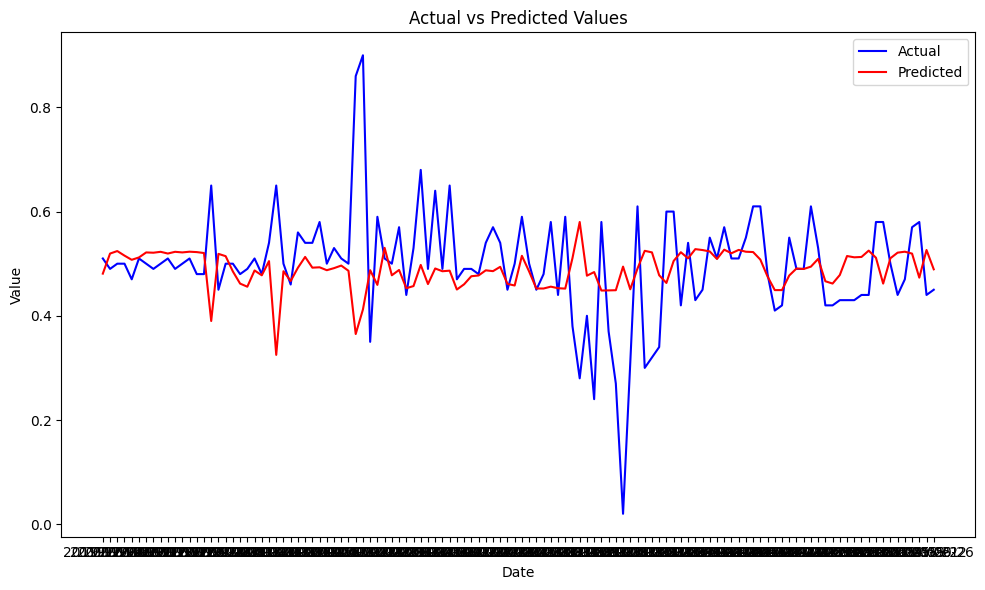

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(results_df['Date'], results_df['Actual'], label='Actual', color='blue')
plt.plot(results_df['Date'], results_df['Predicted'], label='Predicted', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.tight_layout()
plt.show()